In [0]:

GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/brain-tumor-images-dataset/BrainTumorImagesDataset/"
training_data_dir = path + "training_set" # 10 000 * 2
test_data_dir = path + "test_set" 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Using TensorFlow backend.


In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [0]:
img_width, img_height = 299, 299
nb_train_samples = 140
nb_validation_samples = 20 
batch_size = 16
epochs = 50


In [0]:

# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
base_model = InceptionV3(weights = None, include_top=False, input_shape = (img_width, img_height, 3))
# summarize the model
base_model.summary()














Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________

In [0]:
# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

In [0]:

train_generator = train_datagen.flow_from_directory(
training_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
train_generator = train_datagen.flow_from_directory(
training_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
from keras.layers import Dense, AveragePooling2D, GlobalAveragePooling2D, Input, Flatten, Dropout

x = base_model.output
x = AveragePooling2D((8, 8), border_mode='valid', name='avg_pool')(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(input=base_model.input, output=predictions)

# compile the model 
model.compile(loss = "binary_crossentropy", optimizer = optimizers.Adam(lr=0.001), metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D((8, 8), name="avg_pool", padding="valid")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
from keras.callbacks import CSVLogger
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"

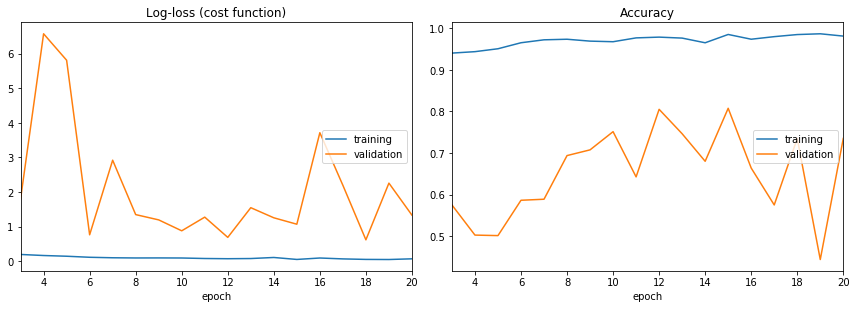

Log-loss (cost function):
training   (min:    0.046, max:    0.405, cur:    0.067)
validation (min:    0.616, max:    6.576, cur:    1.330)

Accuracy:
training   (min:    0.842, max:    0.987, cur:    0.981)
validation (min:    0.444, max:    0.808, cur:    0.735)


In [0]:
from livelossplot.keras import PlotLossesCallback
history=model.fit_generator(train_generator,
                         steps_per_epoch = 140,
                         epochs = 20,
                         validation_data=validation_generator,
                         validation_steps=20,
                         callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)
